<a href="https://colab.research.google.com/github/mrinaligupta255/Practice-on-Keras-Library/blob/master/Time_Series_analysis_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers import Dense,LSTM
from keras.models import Sequential

plt.style.use(['dark_background'])

seed=1
url='https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv'

Using TensorFlow backend.


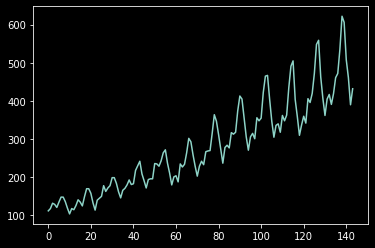

In [0]:
dataframe=pd.read_csv(url,sep=';',usecols=[1])
dataset=dataframe.values
dataset=dataset.astype('float32')
plt.plot(dataset)

In [0]:
#normalize the dataset
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

#split data into train and test set
train_size=int(len(dataset)*0.67)
test_size=len(dataset)-train_size
train=dataset[0:train_size,:]
test=dataset[train_size:len(dataset),:]

In [0]:
#to convert the problem into regression
#given the number of passenger for the last 'look_back months',fing the number of passenger in the next month
def create_dataset(dataset,look_back=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-look_back):
    dataX.append(dataset[i:i+look_back,0])
    dataY.append(dataset[i+look_back,0])

  return np.array(dataX),np.array(dataY)


LSTM network excepts the input data(X) in form of [samples,time_steps,features]

In [0]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)
print(testX.shape)
trainX=trainX.reshape((trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))
print(testX.shape)

(47, 1)
(47, 1, 1)


In [0]:
model=Sequential()
model.add(LSTM(4,input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=200,batch_size=2,verbose=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 1))`
  


In [0]:
trainscore=model.evaluate(trainX,trainY,verbose=0)
print('Train score',trainscore,math.sqrt(trainscore))
testscore=model.evaluate(testX,testY,verbose=0)
print('Train score',testscore,math.sqrt(testscore))

Train score 0.0019344787260419443 0.04398270939860281
Train score 0.009451211628286129 0.09721734221982274
